## Assignment 1: Question 2

---


Samarth Kumar

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

### 2b) Preprocess Data.

In [24]:
def preprocess(data):

    # Move the Appliances column (target variable) to the end of the dataframe.
    # Separate the features (X) from the target variable (Y).
    Y = data['Appliances']
    data.drop(['Appliances'], axis=1, inplace=True)
    X = data.iloc[:, :-1]
    X.drop(['date'], axis=1, inplace=True)

    # Return the X and Y values.
    return X, Y

In [25]:
# Load the data
train = pd.read_csv('energy_train.csv')
test = pd.read_csv('energy_test.csv')
val = pd.read_csv('energy_val.csv')

# Preprocess the data
trainx, trainy = preprocess(train)
valx, valy = preprocess(test)
testx, testy = preprocess(val)

trainx = trainx.astype(float)
trainy = trainy.astype(float)

Check for missing values. Fortunately there are no missing values.

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9868 entries, 0 to 9867
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         9868 non-null   object 
 1   lights       9868 non-null   int64  
 2   T1           9868 non-null   float64
 3   RH_1         9868 non-null   float64
 4   T2           9868 non-null   float64
 5   RH_2         9868 non-null   float64
 6   T3           9868 non-null   float64
 7   RH_3         9868 non-null   float64
 8   T4           9868 non-null   float64
 9   RH_4         9868 non-null   float64
 10  T5           9868 non-null   float64
 11  RH_5         9868 non-null   float64
 12  T6           9868 non-null   float64
 13  RH_6         9868 non-null   float64
 14  T7           9868 non-null   float64
 15  RH_7         9868 non-null   float64
 16  T8           9868 non-null   float64
 17  RH_8         9868 non-null   float64
 18  T9           9868 non-null   float64
 19  RH_9  

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         2961 non-null   object 
 1   lights       2961 non-null   int64  
 2   T1           2961 non-null   float64
 3   RH_1         2961 non-null   float64
 4   T2           2961 non-null   float64
 5   RH_2         2961 non-null   float64
 6   T3           2961 non-null   float64
 7   RH_3         2961 non-null   float64
 8   T4           2961 non-null   float64
 9   RH_4         2961 non-null   float64
 10  T5           2961 non-null   float64
 11  RH_5         2961 non-null   float64
 12  T6           2961 non-null   float64
 13  RH_6         2961 non-null   float64
 14  T7           2961 non-null   float64
 15  RH_7         2961 non-null   float64
 16  T8           2961 non-null   float64
 17  RH_8         2961 non-null   float64
 18  T9           2961 non-null   float64
 19  RH_9  

In [28]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906 entries, 0 to 6905
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6906 non-null   object 
 1   lights       6906 non-null   int64  
 2   T1           6906 non-null   float64
 3   RH_1         6906 non-null   float64
 4   T2           6906 non-null   float64
 5   RH_2         6906 non-null   float64
 6   T3           6906 non-null   float64
 7   RH_3         6906 non-null   float64
 8   T4           6906 non-null   float64
 9   RH_4         6906 non-null   float64
 10  T5           6906 non-null   float64
 11  RH_5         6906 non-null   float64
 12  T6           6906 non-null   float64
 13  RH_6         6906 non-null   float64
 14  T7           6906 non-null   float64
 15  RH_7         6906 non-null   float64
 16  T8           6906 non-null   float64
 17  RH_8         6906 non-null   float64
 18  T9           6906 non-null   float64
 19  RH_9  

### 2c) Standard Linear Regression

In [29]:
def eval_linear1(trainx, trainy, valx, valy, testx, testy):
    model = LinearRegression()
    model.fit(trainx, trainy)

    train_pred = model.predict(trainx)
    val_pred = model.predict(valx)
    test_pred = model.predict(testx)

    # Output should be a dictionary.
    return {
        'train-rmse': np.sqrt(mean_squared_error(trainy, train_pred)),
        'train-r2': r2_score(trainy, train_pred),
        'val-rmse': np.sqrt(mean_squared_error(valy, val_pred)),
        'val-r2': r2_score(valy, val_pred),
        'test-rmse': np.sqrt(mean_squared_error(testy, test_pred)),
        'test-r2': r2_score(testy, test_pred)
    }

In [30]:
# Evaluate the linear regression model for train, test, and validation data.
output_dict = eval_linear1(trainx, trainy, valx, valy, testx, testy)

# Display the dictionary in a pandas dataframe.
lr_dataframe = pd.DataFrame(output_dict.items(), columns=['Metric', 'Value'])
display(lr_dataframe)

,Metric,Value
0,train-rmse,98.282626
1,train-r2,0.185900
2,val-rmse,103.916417
3,val-r2,-0.307661
4,test-rmse,99.140370
5,test-r2,-0.030319


### 2d) Ridge Regression

In [31]:
def eval_ridge(trainx, trainy, valx, valy, testx, testy, alpha):
    model = Ridge(alpha=alpha)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    val_pred = model.predict(valx)
    test_pred = model.predict(testx)

    return train_pred, val_pred, test_pred

In [32]:
# Apply ridge with alpha = 0.1
train_ridge, val_ridge, test_ridge = eval_ridge(trainx, trainy, valx, valy, testx, testy, 0.1)

print('Ridge Regresion: \n')
print(f'Train: {train_ridge}')
print(f'Val: {val_ridge}')
print(f'Test: {test_ridge}\n')

Ridge Regresion: 

Train: [175.06023332 164.56862042 162.99779631 ...  77.07632528  78.7034553
  79.6393734 ]
Val: [ 82.107516    82.60186465  85.08201972 ... 169.15862418 156.1747467
 143.05896103]
Test: [82.98379105 83.23491623 84.95231426 ... 75.99454272 77.19170867
 77.64221346]



### 2e) Lasso Regression

In [33]:
def eval_lasso(trainx, trainy, valx, valy, testx, testy, alpha):
    model = Lasso(alpha=alpha)
    model.fit(trainx, trainy)
    train_pred = model.predict(trainx)
    val_pred = model.predict(valx)
    test_pred = model.predict(testx)

    return train_pred, val_pred, test_pred

In [34]:
# Apply lasso with alpha = 0.1
train_lasso, val_lasso, test_lasso = eval_lasso(trainx, trainy, valx, valy, testx, testy, 0.1)

print('Lasso Regresion: \n')
print(f'Train: {train_lasso}')
print(f'Val: {val_lasso}')
print(f'Test: {test_lasso}')

Lasso Regresion: 

Train: [175.37953034 164.97877047 163.49218104 ...  76.36341847  77.96959199
  78.9015467 ]
Val: [ 82.91942089  83.34093952  85.75072956 ... 169.19567712 156.56469624
 143.85974135]
Test: [82.17030042 82.46285032 84.16251138 ... 76.93205447 78.0870581
 78.55741509]


### 2f) Report the results for different λ values.

In [35]:
def report(trainx, trainy, valx, valy, testx, testy,
           lambda_values=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]):

    results = []
    for lamb in lambda_values:
        train_pred, val_pred, test_pred = eval_ridge(trainx, trainy, valx, valy, testx, testy, lamb)
        train_rmse = np.sqrt(mean_squared_error(trainy, train_pred))
        val_rmse = np.sqrt(mean_squared_error(valy, val_pred))
        test_rmse = np.sqrt(mean_squared_error(testy, test_pred))
        train_r2 = r2_score(trainy, train_pred)
        val_r2 = r2_score(valy, val_pred)
        test_r2 = r2_score(testy, test_pred)
        results.append((lamb, train_rmse, val_rmse, test_rmse, train_r2, val_r2, test_r2))

    df = pd.DataFrame(results, columns=['Lambda', 'Train RMSE',
                               'Val RMSE', 'Test RMSE',
                               'Train R2', 'Val R2', 'Test R2'])
    display(df)

In [21]:
# Reporting results with a table using different alpha values
report(trainx, trainy, valx, valy, testx, testy)

,Lambda,Train RMSE,Val RMSE,Test RMSE,Train R2,Val R2,Test R2
0,0.0001,98.231038,100.030235,97.539866,0.186754,-0.211685,0.002679
1,0.0010,98.231038,100.030242,97.539870,0.186754,-0.211685,0.002679
2,0.0100,98.231038,100.030307,97.539905,0.186754,-0.211686,0.002678
3,0.1000,98.231039,100.030966,97.540261,0.186754,-0.211702,0.002671
4,1.0000,98.231041,100.037552,97.543819,0.186754,-0.211862,0.002598
5,10.0000,98.231248,100.102973,97.579103,0.186751,-0.213447,0.001876
6,100.0000,98.241368,100.573997,97.850971,0.186583,-0.224894,-0.003693
7,1000.0000,98.399903,98.559786,97.654893,0.183956,-0.176323,0.000325
8,10000.0000,99.729679,89.642195,95.056836,0.161751,0.026912,0.052809


### 2g) Coefficient Path Plots

In [36]:
def plot_coefficients(trainx, trainy, alpha):
    _, ax = plt.subplots(1,2, figsize=(10, 5))

    # Ridge
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(trainx, trainy)
    ax[0].plot(ridge_model.coef_, 'b')
    ax[0].set_xlabel('Coefficient Index')
    ax[0].set_ylabel('Coefficient Value')
    ax[0].set_title('Ridge Coefficient Path')

    # Lasso
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(trainx, trainy)
    ax[1].plot(lasso_model.coef_, 'r')
    ax[1].set_xlabel('Coefficient Index')
    ax[1].set_ylabel('Coefficient Value')
    ax[1].set_title('Lasso Coefficient Path')

    plt.show()

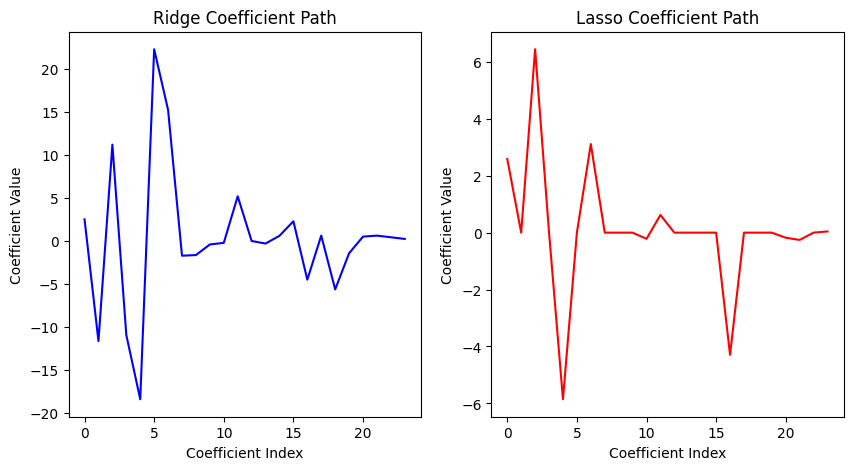

In [37]:
# Plotting coefficients for ridge and lasso.
plot_coefficients(trainx, trainy, 10)